# Major Project COMP8220 Machine Learning

A image dataset including 9328 images features and labels was given to build model upon. These images captured the emotions of human faces and we were to build the a model to learn these emotions. Using these models we had to predict labels for public test set and private test set. The public test set given was of size 1136 which contained only the image features was released along with the initial dataset. On 4th Nov the private dataset was released and the best performing model could be any - one built using conventional approach or deep learning approach was to be used to predict the labels. These predictions were submitted in Kaggle Competition. The environment used to train the model was Google Colab with GPU as the runtime. Few of the models were built on jupyter notebook utilizing the system GPU. The goal of the project was to familiarize us with the machine learning approaches taught us throughout the course. 

## Facial Expression Recognition

In [ ]:
# Importing classes required working in colab and importing the data
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive

drive.mount('/content/drive/')

image_size = 48
EMOTIONS = ['angry', 'disgusted', 'fearful','happy', 'sad', 'surprised', 'neutral']
dataset_directory = '/content/drive/My Drive/Colab Notebooks/ML/facial-expression-recognition'  # defining the directory for data sets to load from

Mounted at /content/drive/


In [ ]:
# Importing the image data as a numpy array
images_train = np.load(join(dataset_directory, 'Training_data_images.npy'))
# Importing the labels as a numpy array
labels_train = np.load(join(dataset_directory, 'Training_data_labels.npy'))

# Importing the public test set
images_test_public = np.load(join(dataset_directory, 'PublicTest_data_images.npy'))

# Reshaping the image from 3D to 2D
images_train = images_train.reshape([-1, image_size, image_size])
images_test_public = images_test_public.reshape([-1, image_size, image_size])

print(images_train.shape)
print(labels_train.shape)
print(images_test_public.shape)

(9328, 48, 48)
(9328,)
(1136, 48, 48)


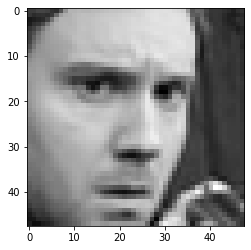

In [ ]:
plt.imshow(images_train[0], cmap='gray') # displaying one image from image data

## Conventional ML Model


In [ ]:
from sklearn.model_selection import train_test_split # for spliting data into train and test sets
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
# Reshape the data to build conventional ML models
nsamples, nx, ny = images_train.shape
images_train_re = images_train.reshape((nsamples,nx*ny))

ysamples, yx, yy = images_test_public.shape
images_test_public_re = images_test_public.reshape((ysamples,yx*yy))

#### Applying Random Forest Model using Stratified Shuffle Split dataset

In [ ]:
# test size of 25% of the original data 
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

In [ ]:
# split the image data and labels data
sss.get_n_splits(images_train, labels_train)
sss

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.25,
            train_size=None)

In [ ]:
for train_index, test_index in sss.split(images_train_re, labels_train):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train3, X_test3 = images_train_re[train_index], images_train_re[test_index]
  y_train3, y_test3 = labels_train[train_index], labels_train[test_index]

TRAIN: [5623 8725 8000 ... 9235 6058 9088] TEST: [1485 6642 2660 ... 7211 3853 5517]
TRAIN: [1466 3028 3536 ... 3756 2654 9063] TEST: [6964 9147 6377 ...  854 2030 5110]
TRAIN: [7512 6348 1267 ... 3722 4182 3521] TEST: [6518 4677  191 ... 3308 6653  886]
TRAIN: [6866 9252 4591 ... 2577 5418 5326] TEST: [8442  325 5742 ... 3913 8950 8828]
TRAIN: [6826 5734 2942 ... 2858 6618 6322] TEST: [1657 1147 2703 ... 9237 4703 8098]


In [ ]:
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(6996, 2304)
(2332, 2304)
(6996,)
(2332,)


Using the random forest classifier model with estimators as 150 and checking the accuracy of the model using score function and checking the misclassified data using crosstab. 

In [ ]:
rfsk_clf = RandomForestClassifier(n_estimators=150, random_state=123456) # creating a random forest classifier

rfsk_clf.fit(X_train3, y_train3) # fit our training data on the model

y_pred_rfsk = rfsk_clf.predict(X_test3) # predict on the test data

print("Predicted value for test data: ", y_pred_rfsk)
print("Accuracy Score of Random Forest: %.4f\n"% rfsk_clf.score(X_test3, y_test3)) # mean accuracy for the test data and labels 

# Confusion Matrix/Crosstab for Random Forest
y_test_rfsk = pd.Series(y_test3, name='Actual')
y_pred_rfsk = pd.Series(y_pred_rfsk, name='Predicted')
rfsk_clf_confusion = pd.crosstab(y_test_rfsk, y_pred_rfsk) # represent how the labels are classified
print("Confusion Matrix/ Crosstab for Random Forest: \n", rfsk_clf_confusion)

Predicted value for test data:  [4 6 6 ... 5 3 3]
Accuracy Score of Random Forest: 0.5497

Confusion Matrix/ Crosstab for Random Forest: 
 Predicted   0   1   2    3   4    5    6
Actual                                  
0          97   0   5   98   6   12   98
1           4  22   1   18   0    1    7
2          41   0  61   69  10   21   75
3          12   0   5  605   2    8   52
4          22   0   8   77  37    8  109
5          12   0   5   53   2  161   30
6          21   0   9  127  10   12  299


In [ ]:
# predicitng on the public test set to be submitted on kaggle
public_pred_rfsk = rfsk_clf.predict(images_test_public_re)
print(public_pred_rfsk.shape)

(1136,)


In [ ]:
# saving the predictions to a dataframe and then writing the dataframe to a csv file on drive
predictionsk_df = pd.DataFrame(columns=['Predictions'])

predictionsk_df['Predictions'] = public_pred_rfsk

predictionsk_df['ID'] = predictionsk_df.index

predictionsk_df.head()

outputsk_df = predictionsk_df[['ID', 'Predictions']]

outputsk_df.head()

outputsk_df.to_csv('/content/drive/My Drive/Colab Notebooks/ML/facial-expression-recognition/46153454_conventional.csv', index= False)

#### Notes on the Conventional ML Model

For the final coneventional ML model selected was Random Forest considering n_estimators as 100 and random_state 123456. The data used to train this model was generated using StratifiedShuffleSplit split with split size as 5. This cross validation object 'sss' is a combination of StratifiedKFold and ShuffleShift and returns randomized stratified folds. This model gives an accuracy of 0.5497.

In addition to the final model, I also tried **SVM** which gave accuracy **40%**. Also **Decision Tree** was trained which gave an accuracy of **36%**. By using stratified kfold split on the train_test_split for Random forest the accuracy was observed to be **52%**. Finally, the best accuracy score was achieved for a Random Forest Model with StratifiedShuffleSplit data. 

## Deep Learning Model

The final model that produced the best-performing predictions for the Kaggle submission (accuracy 62%) was a fully connected dense model with 4 layers.  The input was the raw data that had been preprocessed by a conventional neural network model.

In [ ]:
# loading initial classes required for keras implemenation of deep learning models
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from skimage.transform import resize
from PIL import Image
from keras.optimizers import SGD

In [ ]:
# spliting the data into train test and validation split in 64:20:16 ratio
X_train1, X_test, y_train1, y_test = train_test_split(images_train, labels_train, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42) 

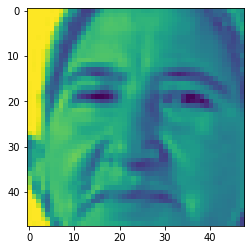

In [ ]:
# plot array like or PIL images using imshow
plt.imshow(X_train[0])

In [ ]:
# defining a preocedure for initial processing of the image to use in deep learning model
def procedure_img(input):
    img=Image.fromarray(input*255)
    return np.asarray(img)

In [ ]:
# transforming the training data
X_train = np.array([procedure_img(i) for i in X_train])

In [ ]:
# transforming the test data
X_test = np.array([procedure_img(i) for i in X_test])

In [ ]:
# transforming the validation data
X_val = np.array([procedure_img(i) for i in X_val])

In [ ]:
# expanding the dimensions on image features data
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
X_val = np.expand_dims(X_val, axis=3)

In [ ]:
# convert labels to one-hot vectors as it is the format that is required by keras
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print(y_train.shape)

(5969, 7)


In [ ]:
print(X_train.shape, X_test.shape, X_val.shape,y_train.shape, y_test.shape, y_val.shape)

(5969, 48, 48, 1) (1866, 48, 48, 1) (1493, 48, 48, 1) (5969, 7) (1866, 7) (1493, 7)


In [ ]:
# build the network
model = Sequential()  # stack layers for one input and output
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:])) # convolution layer for extracting feature from the image
model.add(Activation('relu')) # adding activation to the layer above
model.add(MaxPooling2D(pool_size=(2, 2))) # downsize the input layer above
model.add(BatchNormalization()) # normalize the input layer above
model.add(Dropout(0.25))  # prevent the model from overfitting

# repeat the above layers with increased kernel size for convolution layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# repeat the above layers with increased kernel size for convolution layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
               
# repeat the above layers with increased kernel size for convolution layer
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# flatten the above layers output to pass on to dense layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.summary()

Input dimensions:  (48, 48, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 23, 23, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
activation_1 (Activatio

In [ ]:
# callback funtion defining the parameters to monitor and the mode in which it should be monitored
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath="emotion_recog.csv",
                             monitor="val_accuracy",
                             mode="max",
                             save_best_only=True,
                             verbose=1)
callbacks = [checkpoint]

In [ ]:
# compiling the model 
# SGD classifier used as the optimizer
opt = SGD(lr=0.01, momentum=0.9,decay=1e-6)
# model complied using optimizer as defined above, loss as categorical_crossentropy since we are having multi class classification problem
# and metrics as accuracy to monitor
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [ ]:
# train the model built using the batches as of 32 size and repeat iteratively over the dataset 40 times(epoch)
# passed the validation dataset as to monitor validation loss and metrics at every epoch end
history = model.fit(X_train, y_train, batch_size=128, epochs=40, callbacks=callbacks,  validation_data=(X_val, y_val))

Epoch 1/40
47/47 [==============================] - ETA: 0s - loss: 1.8930 - accuracy: 0.2674
Epoch 00001: val_accuracy improved from -inf to 0.10181, saving model to emotion_recog.csv
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: emotion_recog.csv/assets
47/47 [==============================] - 3s 72ms/step - loss: 1.8930 - accuracy: 0.2674 - val_loss: 2.0914 - val_accuracy: 0.1018
Epoch 2/40
46/47 [============================>.] - ETA: 0s - loss: 1.7402 - accuracy: 0.3098
Epoch 00002: val_accuracy improved from 0.10181 to 0.33958, saving model to emotion_recog.csv
INFO:tensorflow:Assets written to: emotion_recog.csv/assets
47/47 [==============================] - 3s 63ms/step - loss: 1.7421 - accuracy: 0.3093 - val_loss: 1.7840 - val_accuracy: 0.3396
Epoch 3/40
45

In [ ]:
# evaluate on the test dataset
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.2674615383148193
Test accuracy: 0.6205787658691406


In [ ]:
# preprocessing the public test set to make predictions on
public_test_given = np.array([proc_img(i) for i in images_test_public])
public_test_given = np.expand_dims(public_test_given, axis=3)

In [ ]:
# predicitng classes of the public data set
predict_dl = model.predict_classes(public_test_given)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
predict_dl

array([3, 3, 6, ..., 3, 3, 6])

In [ ]:
# saving the predictions as format required to be submitted on kaggle
predictionsk_df = pd.DataFrame(columns=['Predictions'])

predictionsk_df['Predictions'] = predict_dl

predictionsk_df['ID'] = predictionsk_df.index

predictionsk_df.head()

outputsk_df = predictionsk_df[['ID', 'Predictions']]

outputsk_df.head()

outputsk_df.to_csv('/content/drive/My Drive/Colab Notebooks/ML/facial-expression-recognition/46153454_deep_public.csv', index= False)

In [ ]:
# preprocessing private dataset on private dataset released on 4th November
private_dataset = np.load(join(dataset_directory, 'PrivateTest_data_images.npy'))
private_dataset = np.array([proc_img(i) for i in private_dataset])
private_dataset = np.expand_dims(private_dataset, axis=3)

In [ ]:
# predicting on the private dataset
private_dataset_dl = model.predict_classes(private_dataset)

In [ ]:
private_dataset_dl

array([6, 3, 3, ..., 6, 3, 2])

In [ ]:
# saving the predications on the private dataset to be uploaded 
predictionsk_df = pd.DataFrame(columns=['Predictions'])

predictionsk_df['Predictions'] = private_dataset_dl

predictionsk_df['ID'] = predictionsk_df.index

predictionsk_df.head()

outputsk_df = predictionsk_df[['ID', 'Predictions']]

outputsk_df.head()

outputsk_df.to_csv('/content/drive/My Drive/Colab Notebooks/ML/facial-expression-recognition/4615343_deep_private.csv', index= False)

## Notes on the Deep Learning Model

In the final model, I have tried a CNN with four layers each having convolution layer followed by activation,  pooling, batch normalization and dropout layer. The activation function used was relu as it is considered to be a optimial activation function as compared to other available ones. This is then downsized by the maxpooling layer and this downsized output is normalized and scaled using batchnormalization. To prevent the model from overfitting dropout layers are used. Then the flatten layer converts the matrix output into array. ModelCheckpoint callback is used to save the max val_accuracy of the model while fit. This model gave a validation accuracy of **62%**. On the public test set this model gave **60%** accuracy and **62%** on private test set submitted on kaggle. The model was performing better on SGD than Adam as the optimizer. This might be due to the fact that Adam fails to converge to an optimal solution under some specific settings.

In addition to this I implemented the DeXpression model presented in https://arxiv.org/pdf/1509.05371.pdf paper with some alterations and the accuracy was obtained of 44%. The input data has a size of 224 * 224 for this model so the data was resized and the model was applied on it.

In [ ]:
# resizing the data to apply the model on
def proc_img(inp):
    inp2=resize(inp,(224,224))
    img=Image.fromarray(inp2*255).convert("RGB")
    return np.asarray(img)

In [ ]:
# splitting data into training, testing and validation data set
X_train, X_test1, y_train, y_test1 = train_test_split(images_train, labels_train, random_state=42, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42) 

In [ ]:
X_train = np.array([proc_img(i) for i in X_train])

In [ ]:
X_test = np.array([proc_img(i) for i in X_test])

In [ ]:
X_val = np.array([proc_img(i) for i in X_val])

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
print(X_train.shape, X_test.shape, X_val.shape,y_train.shape, y_test.shape, y_val.shape)

(6529, 224, 224, 3) (1959, 224, 224, 3) (840, 224, 224, 3) (6529, 7) (1959, 7) (840, 7)


In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import regularizers

In [ ]:
# build the network
model1 = Sequential()
input = Input(shape=(224, 224, 3))
dropout = Dropout(0.25)(input)
convo1 = Conv2D(64, (1, 1), strides=2, activation="relu")(dropout)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(convo1)
batchnorm1 = BatchNormalization()(maxpool1)
dropout1 = Dropout(0.25)(batchnorm1)
convo2a = Conv2D(96, (1, 1),padding='valid',strides=(1, 1), activation="relu")(dropout1)
maxpool2a = MaxPooling2D(pool_size=(1, 1))(dropout1)
convo2b = Conv2D(208, (1, 1),padding='valid',strides=(1, 1), activation="relu")(convo2a)
convo2c = Conv2D(64, (1, 1),padding='valid',strides=(1, 1), activation="relu")(maxpool2a)
result1 = concatenate([convo2b, convo2c])
maxpool2b = MaxPooling2D(pool_size=(2, 2))(result1)

convo3a = Conv2D(96, (1, 1),padding='valid',strides=(1, 1), activation="relu")(maxpool2b)
maxpool3a = MaxPooling2D(pool_size=(1, 1))(maxpool2b)
convo3b = Conv2D(208, (1, 1),padding='valid',strides=(1, 1), activation="relu")(convo3a)
convo3c = Conv2D(64, (1, 1),padding='valid',strides=(1, 1), activation="relu")(maxpool3a)
result2 = concatenate([convo3b, convo3c])
maxpool3b = MaxPooling2D(pool_size=(2, 2), strides=2)(result2)

flat = Flatten()(maxpool3b)
output= Dense(7, activation='softmax')(flat)
model1 = Model(inputs = input, outputs = output)

model1.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 112, 112, 64) 256         dropout_2[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_7[0][0]                   
_______________________________________________________________________________________

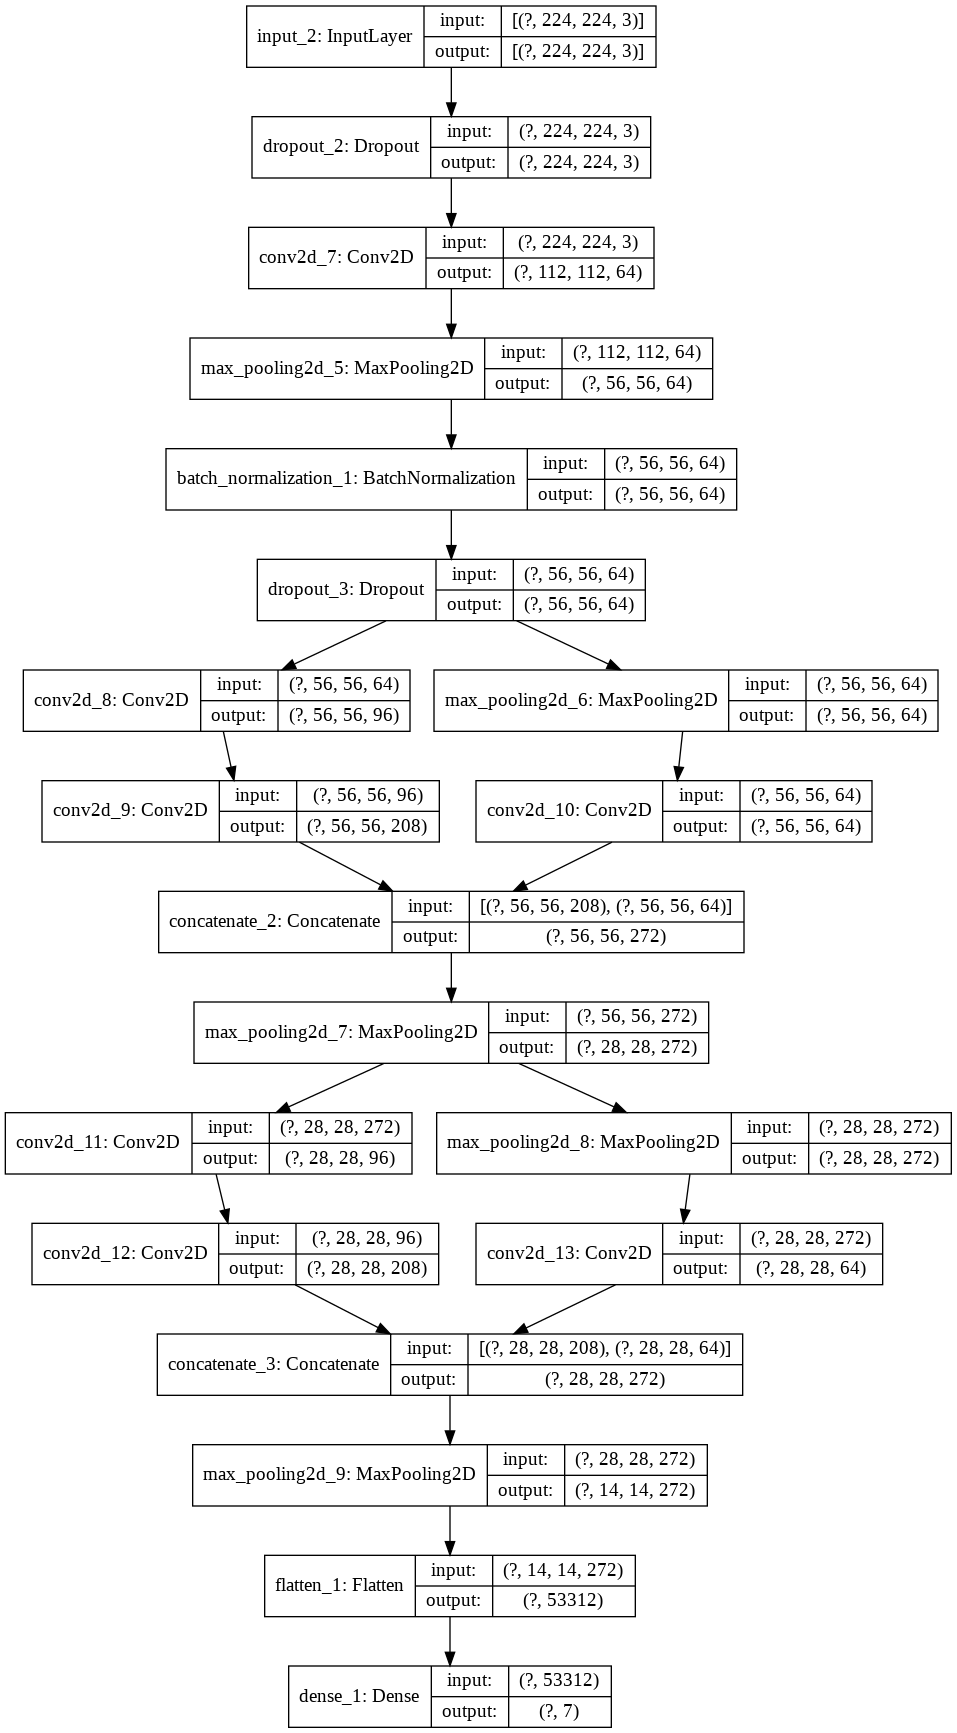

In [ ]:
# visualize the model
from keras.utils import plot_model
plot_model(model1, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint1 = ModelCheckpoint(filepath="face_recognition.csv",
                             monitor="val_acc",
                             mode="max",
                             save_best_only=True,
                             verbose=1)
callbacks1 = [checkpoint1]
print(callbacks1)

In [ ]:
opt1 = keras.optimizers.SGD(lr=0.00001,decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(optimizer= opt1, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model1.fit(X_train,y_train, batch_size=32, epochs=20, callbacks=callbacks1,validation_data=(X_val,y_val))

Epoch 1/20
205/205 [==============================] - 9s 45ms/step - loss: 2.0197 - accuracy: 0.3325 - val_loss: 1.7226 - val_accuracy: 0.3357
Epoch 2/20
205/205 [==============================] - 9s 44ms/step - loss: 1.5950 - accuracy: 0.4115 - val_loss: 1.6581 - val_accuracy: 0.3750
Epoch 3/20
205/205 [==============================] - 9s 44ms/step - loss: 1.5177 - accuracy: 0.4413 - val_loss: 1.7276 - val_accuracy: 0.3393
Epoch 4/20
205/205 [==============================] - 9s 44ms/step - loss: 1.4589 - accuracy: 0.4648 - val_loss: 1.7242 - val_accuracy: 0.3452
Epoch 5/20
205/205 [==============================] - 9s 44ms/step - loss: 1.4240 - accuracy: 0.4745 - val_loss: 1.6232 - val_accuracy: 0.3345
Epoch 6/20
205/205 [==============================] - 9s 44ms/step - loss: 1.3896 - accuracy: 0.4912 - val_loss: 1.5262 - val_accuracy: 0.4357
Epoch 7/20
205/205 [==============================] - 9s 43ms/step - loss: 1.3539 - accuracy: 0.5047 - val_loss: 1.6031 - val_accuracy: 0.3929

In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.513043761253357
Test accuracy: 0.4400204122066498


## Discussion of Model Performance and Implementation

Comparing my final conventional ML and deep learning models, the deep learning one performed better by **9%** on the public test set.  The deep learning model **ranked 35 out of 65 submissions** on the public test set. The model had a prediction score of **62%** on the private data set as expected. Whereas the model achieved an accuracy of **60%** on public dataset which indicates that the there might be some overfitting in the data. As we can see from the model fit output the model performs well on training data but poor on the validation data which is an indication that the conventional CNN model is overfitting. Early stopping and regularlization can be used to prevent the model from overfitting. Data augmentation can also be applied to improve the training data quality. Applied few of these techniques and there was no significant improvement found in the model output. 

Adding more data to the model could help overcome this issue. Training the model on a wider dataset could mitigate the overfitting issue and also improve the performance of the model. Smaller training size could increase the tendancy of the model to overfit and the model could lack generalization capabality.

